In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

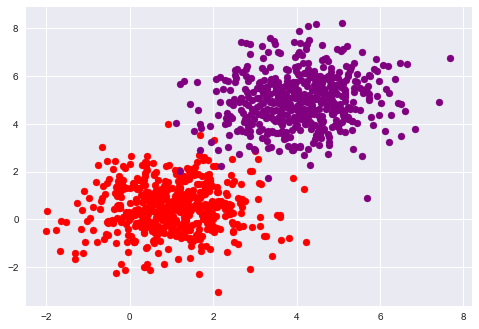

In [113]:
plt.style.use('seaborn')
plt.scatter(dist_01[:,0],dist_01[:,1],color = 'red')
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'purple')
plt.show()

### Create Training and Testing Set

In [115]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [116]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1

In [117]:
np.random.shuffle(data)
print(data[:10])

[[ 2.89354613  6.90812831  1.        ]
 [ 4.60057929  4.01482345  1.        ]
 [ 4.85123934  5.2693011   1.        ]
 [ 5.155186    5.38935488  1.        ]
 [ 4.84797318  5.89470611  1.        ]
 [ 2.93589794 -0.31944744  0.        ]
 [ 2.3780541   4.89762787  1.        ]
 [ 0.87230621  0.24858187  0.        ]
 [ 1.73259079 -0.69351144  0.        ]
 [ 2.36517937  5.78262045  1.        ]]


In [118]:
split  =int(0.8*data.shape[0])


In [119]:
x_train = data[:split,:-1]
x_test = data[split:,:-1]

y_train  =data[:split,-1]
y_test = data[split:,-1]

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


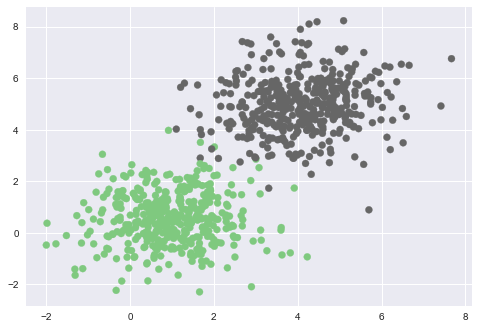

In [120]:
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,cmap = plt.cm.Accent)

In [121]:
x_mean = x_train.mean(axis = 0)
x_std = x_train.std(axis = 0)
x_train = (x_train-x_mean)/x_std
x_test = (x_test - x_mean)/x_std

### Logistic Regression Function

In [122]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))


def error(x,y,theta):
    hi = hypothesis(x,theta)
    error = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    
    return error


def gradient(x,y,theta):
    hi = hypothesis(x,theta)
    
    grad = np.dot(x.T,(y-hi))
    m  = x.shape[0]
    return grad/m
def gradientdescent(x,y,lr = 0.1,maxitr = 500):
    n = x.shape[1]
    error_list = []
    theta = np.zeros((n,1))
    for i in range(maxitr):
        e = error(x,y,theta)
        error_list.append(e)
        
        grad = gradient(x,y,theta)
        
        theta = theta + lr*grad
        
    return theta,error_list
    

In [123]:
ones = np.ones((x_train.shape[0],1))
x_newtrain = np.hstack((ones,x_train))
print(x_newtrain.shape)

(800, 3)


In [124]:
y_train = y_train.reshape((-1,1))
print(y_train.shape)

(800, 1)


In [131]:
theta,error_list = gradientdescent(x_newtrain,y_train)

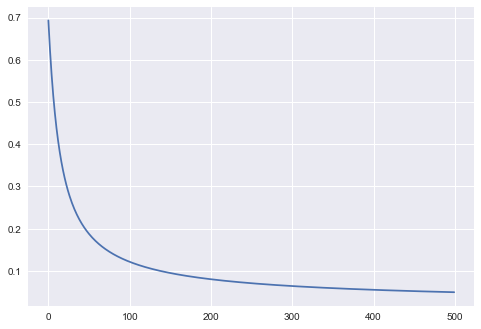

In [132]:
plt.plot(error_list)

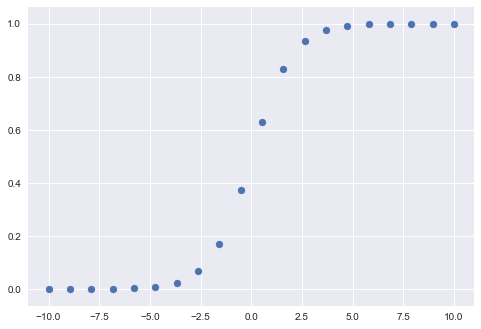

In [133]:
a = np.linspace(-10,10,20)
plt.scatter(a,sigmoid(a))

### Visualise Decision Surface


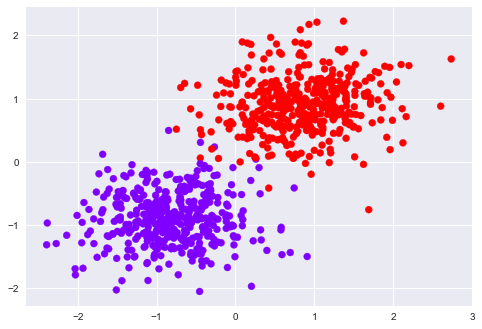

In [134]:
plt.style.use('seaborn')
plt.scatter(x_train[:,0],x_train[:,1],c = y_train.reshape((-1)),cmap = 'rainbow')
plt.show()

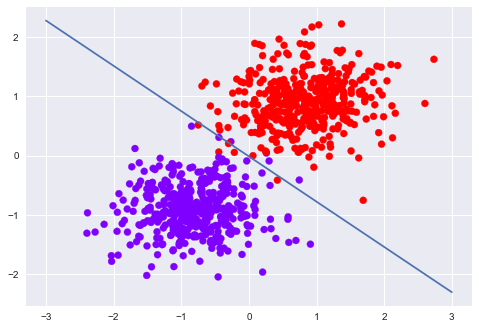

In [135]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train.reshape((-1)),cmap = 'rainbow')
plt.show()

In [136]:
x_newtest = np.hstack((np.ones((x_test.shape[0],1)),x_test))
print(x_newtest.shape)

(200, 3)


In [137]:
def predict(x,theta):
    h = hypothesis(x,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

trainpred = predict(x_newtrain,theta)
testpred = predict(x_newtest,theta)    

In [138]:
def accuracy(actual,pred):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = np.sum(actual==pred) / actual.shape[0]
    return acc*100

In [139]:
trainacc  = accuracy(y_train,trainpred)
print(trainacc)

98.875


In [140]:
testacc = accuracy(y_test,testpred)
print(testacc)

98.0


In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
model = LogisticRegression()

In [143]:
model.fit(x_train,y_train)

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
model.score(x_train,y_train)*100

99.0

In [147]:
model.score(x_test,y_test)*100

99.0